<h1>Step 4: Exploring Data<h1>

In [1]:
import pandas as pd
import numpy as np

mcdonalds = pd.read_csv("mcdonalds.csv")

# Column names and first few rows
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [2]:
# Convert first 11 columns to numeric binary (Yes=1, No=0)
MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == "Yes" else 0)

# Verify the transformation
print(MD_x.mean(axis=0).round(2))


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_3716\3048268706.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == "Yes" else 0)


<h1>Principal Component Analysis (PCA)<h1>

In [3]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# PCA explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance.cumsum())


Explained Variance: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [4]:
# Factor loadings (components)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=MD_x.columns)
print(loadings)


                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy       0.476933 -0.363790  0.304444  0.055162  0.307535 -0.170738   
convenient  0.155332 -0.016414  0.062515 -0.142425 -0.277608  0.347830   
spicy       0.006356 -0.018809  0.037019  0.197619 -0.070620  0.355087   
fattening  -0.116232  0.034094  0.322359 -0.354139  0.073405  0.406515   
greasy     -0.304443  0.063839  0.802373  0.253960 -0.361399 -0.209347   
fast        0.108493  0.086972  0.064642 -0.097363 -0.107930  0.594632   
cheap       0.337186  0.610633  0.149310  0.118958  0.128973  0.103241   
tasty       0.471514 -0.307318  0.287265 -0.002547  0.210899  0.076914   
expensive  -0.329042 -0.601286 -0.024397  0.067816  0.003125  0.261342   
healthy     0.213711 -0.076593 -0.192051  0.763488 -0.287846  0.178226   
disgusting -0.374753  0.139656  0.088571  0.369539  0.729209  0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.280519 -0.013041 -0.572403  0.1102

<h1>Step 5: Extracting Segments (K-means Clustering)<h1>

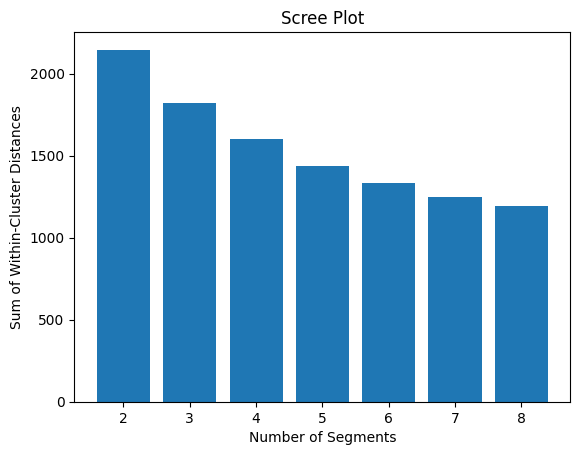

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate K-means for 2 to 8 clusters
wcss = []
for i in range(2, 9):
    kmeans = KMeans(n_clusters=i, random_state=1234, n_init=10)
    kmeans.fit(MD_x)
    wcss.append(kmeans.inertia_)

# Scree Plot
plt.bar(range(2, 9), wcss)
plt.xlabel("Number of Segments")
plt.ylabel("Sum of Within-Cluster Distances")
plt.title("Scree Plot")
plt.show()


<h1>Step 6: Profiling Segments<h1>

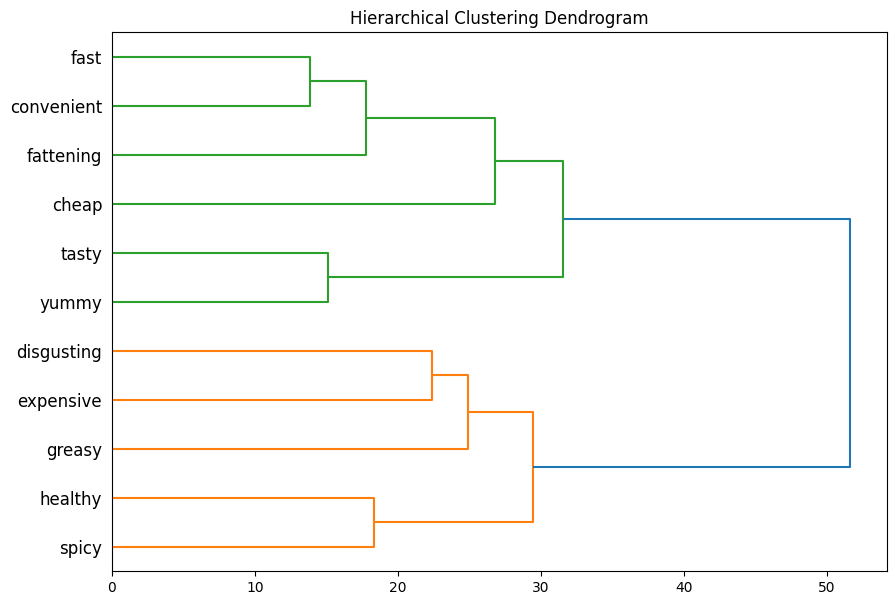

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering
hc = linkage(MD_x.T, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(hc, labels=MD_x.columns, orientation='right')
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


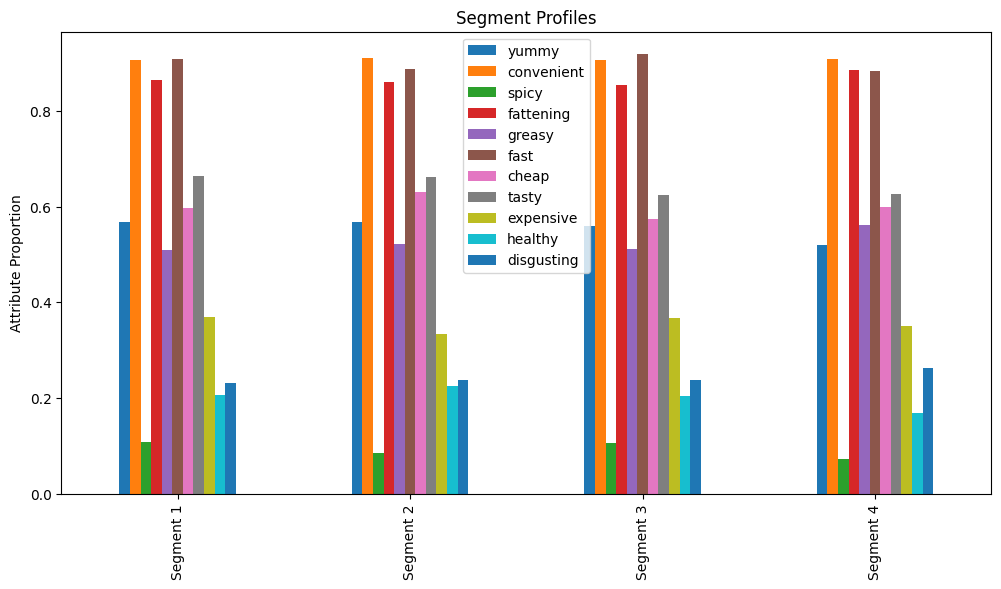

In [7]:
# Example visualization (dummy plot; customize based on real data)
import seaborn as sns

segment_profiles = pd.DataFrame({
    'Segment 1': MD_x.iloc[:470].mean(),
    'Segment 2': MD_x.iloc[470:727].mean(),
    'Segment 3': MD_x.iloc[727:1051].mean(),
    'Segment 4': MD_x.iloc[1051:].mean(),
})

segment_profiles.T.plot(kind='bar', figsize=(12, 6))
plt.title("Segment Profiles")
plt.ylabel("Attribute Proportion")
plt.show()


<h1>Step 7: Describing Segments<h1>

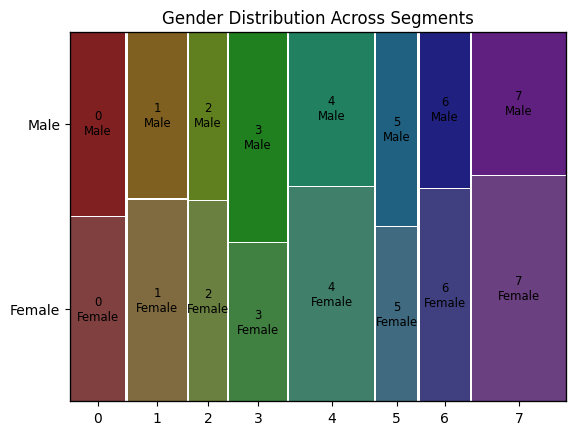

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Gender distribution by segment
segment_gender = pd.crosstab(kmeans.labels_, mcdonalds['Gender'])

# Mosaic plot
mosaic(segment_gender.stack(), title="Gender Distribution Across Segments")
plt.show()


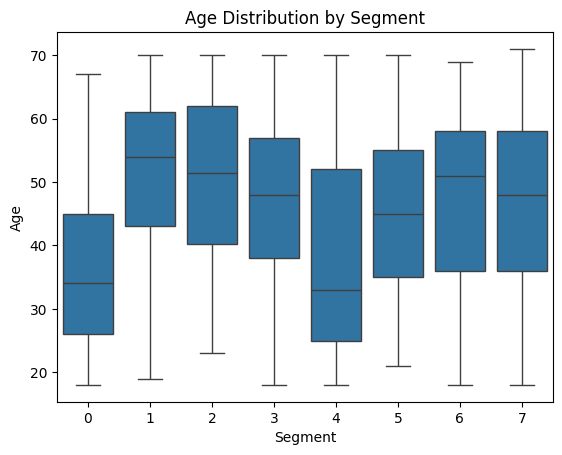

In [9]:
# Age distribution by segment
mcdonalds['Segment'] = kmeans.labels_
sns.boxplot(x='Segment', y='Age', data=mcdonalds)
plt.title("Age Distribution by Segment")
plt.show()
